<H1><B>NLP ASSIGNIMENT<B><H1>

**TASK**<br>
1: Your task is to predict the sentiment of the sentences present in 3.txt and provide csv file with sentences & corresponding predictions.<br>
2: You have to split the data from 1.txt & 2.txt into 80:20 [train test split] and generate a classification report  [e.g. confusion matrix, AUC, Accuracy etc.] on test data.<br>
3: Prepare a brief report describing the approaches you took to complete the task e.g. [Featurisation, Modeling, Metrics etc].

**Data Set**<br>
1:there is text file 1.txt,2.txt and 3.txt<br>
2:where 1.txt and 2.txt is label data and three is unlabel data<br>
**1.txt:**<br>
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0<br>
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0<br>

**2.txt:**<br>
1	The Da Vinci Code book is just awesome.<br>
1	this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.<br>
**3.txt:**<br>
0,0,I exchanged the sony ericson z500a for this and I'm pretty happy with that decision.,<br>
1,1,Oh and I forgot to also mention the weird color effect it has on your phone.,<br>
2,2,"Verizon tech support walked my through a few procedures, none of which worked and I ended up having to do a hard re-set, wiping out all my data.",



In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import string
import re
from wordcloud import WordCloud
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from xgboost import XGBClassifier
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
import gensim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading Data

#### text file one

In [0]:
text_data_1=pd.read_fwf("/content/drive/My Drive/nlp assignments/1.txt",delimiter=".", header = None)#load the .txt file
text_data_1.columns = ["text","label"]#give the columns to the file

In [4]:
text_data_1.shape#print shape

(952, 2)

**here we saprate the text data and the label from the text file**

In [0]:
labels=[]
for i in range(len(text_data_1)):#loop 
    a=text_data_1["text"][i].split()#split the row into words
    if a[-1].isdigit():#check is there any digit if yes then add into labels list
        labels.append(str(a[-1]))
    else:# if not then add NAN value into the list
        labels.append(np.nan)   

In [0]:
text_data_1["label"]=labels #store the values in the label column

In [7]:
text_data_1["label"].isnull().sum()#find null values 

30

In [0]:
text_data_1 = text_data_1.dropna()## drop all rows with any NaN values

In [9]:
text_data_1["label"].value_counts()

1    464
0    458
Name: label, dtype: int64

In [10]:
text_data_1.shape

(922, 2)

In [0]:
text_data_1.label = text_data_1.label.astype('int64') #change the data type into int

In [12]:
text_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 951
Data columns (total 2 columns):
text     922 non-null object
label    922 non-null int64
dtypes: int64(1), object(1)
memory usage: 21.6+ KB


### text file two

In [0]:
text_data_2=pd.read_fwf("/content/drive/My Drive/nlp assignments/2.txt",sep=" ", header = None)

In [32]:
text_data_2.columns = ["label","text","n1","n2"]
text_data_2.head()

,label,text,n1,n2
0,1,The Da Vinci Code book is just awesome.,NaN,NaN
1,1,this was the first clive cussler i've ever rea...,NaN,NaN
2,1,i liked the Da Vinci Code a lot.,NaN,NaN
3,1,i liked the Da Vinci Code a lot.,NaN,NaN
4,1,I liked the Da Vinci Code but it ultimatly did...,NaN,NaN


In [33]:
text_data_2.shape

(7086, 4)

In [34]:
text_data_2["text"][0]

'The Da Vinci Code book is just awesome.'

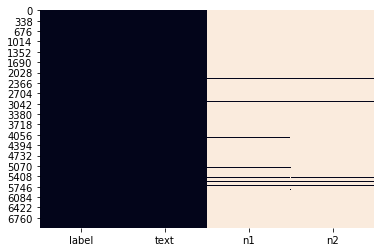

In [36]:
sns.heatmap(text_data_2.isnull(), cbar=False)

In [0]:
a=((text_data_2["n1"].isnull().sum())/(text_data_2.shape[0]))*100
b=((text_data_2["n2"].isnull().sum())/(text_data_2.shape[0]))*100

In [37]:
print("%tage of null value in text data",a," and ",b)

%tage of null value in text data 96.8670618120237  and  97.1916454981654


-  here we see thet most of the values are null so we drop this two columns

In [0]:
text_data_2.drop(["n1","n2"], axis = 1, inplace = True) 

In [39]:
text_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 2 columns):
label    7086 non-null int64
text     7086 non-null object
dtypes: int64(1), object(1)
memory usage: 110.8+ KB


In [40]:
text_data_2.head()

,label,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [0]:
new_data=pd.DataFrame()#create new data frame 

In [0]:
new_data["text"]=text_data_2["text"]#store text column into new data frame
new_data["label"]=text_data_2["label"]#store label column into new data frame

In [43]:
new_data.shape

(7086, 2)

## combine both dataframes

In [0]:
train= text_data_1.append(new_data)#append both the data frame
train.reset_index(inplace=True)

In [45]:
train["label"].value_counts()

1    4459
0    3549
Name: label, dtype: int64

In [46]:
train.shape

(8008, 3)

In [47]:
train.tail()

,index,text,label
8003,7081,Brokeback Mountain was boring.,0
8004,7082,So Brokeback Mountain was really depressing.,0
8005,7083,"As I sit here, watching the MTV Movie Awards, ...",0
8006,7084,Ok brokeback mountain is such a horrible movie.,0
8007,7085,"Oh, and Brokeback Mountain was a terrible movie.",0


In [0]:
train=train.drop(['index'], axis = 1)#drop the index column

#### text file three(test file)

In [0]:
test=pd.read_fwf("/content/drive/My Drive/nlp assignments/3_new.txt",sep=" ", header = None,index=True)
test.columns = ["text"]

In [57]:
test.head()

,text
0,"0,0,I exchanged the sony ericson z500a for thi..."
1,"1,1,Oh and I forgot to also mention the weird ..."
2,"2,2,""Verizon tech support walked my through a ..."
3,"3,3,Better than you'd expect.,"
4,"4,4,This is a great little item.,"


## - here  we load our all three fils and  first we combine our train and  test file 

In [0]:
old_train=train.copy()#copy the data frame into new variable

In [59]:
print(train.shape,test.shape)

(8008, 2) (932, 1)


In [0]:
targets=train["label"]#store the target into new vaiable

#### **combine our train and test file**

In [0]:
train.drop('label',1,inplace=True)#drop column
train_test_data = train.append(test)#append both files
train_test_data.reset_index(inplace=True)

In [62]:
train_test_data.shape

(8940, 2)

### **cleaning and preprocess data**

In [64]:
train_test_data["text"][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0'

In [67]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) #load stop words from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [76]:
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(train_test_data["text"].values):
    sent = re.sub('[^A-Za-z]+',' ',sentance)#it contain onty alphabats and remove every thing .  
    sent = ' '.join(e for e in sent.split() if e not in stop_words)#seprate the tokans and remove the stop words
    preprocessed_text.append(sent.lower().strip())#change into lower case 

100%|██████████| 8940/8940 [00:00<00:00, 105333.60it/s]


In [0]:
train_test_data["preprocessed_text"]=preprocessed_text#store in data frame

In [0]:
#remove word which have charactor length less then 3  
train_test_data["preprocessed_text"]=train_test_data["preprocessed_text"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [82]:
train_test_data.head()

,index,text,preprocessed_text
0,0,"A very, very, very slow-moving, aimless movie ...",a slow moving aimless movie distressed driftin...
1,1,Not sure who was more lost - the flat characte...,not sure lost flat characters audience nearly ...
2,2,Attempting artiness with black & white and cle...,attempting artiness black white clever camera ...
3,3,Very little music or anything to speak of. \t0,very little music anything speak
4,4,The best scene in the movie was when Gerardo i...,the best scene movie gerardo trying find song ...


**after preprocessing we again separate train an test data files**



In [0]:
train_test_data_old=train_test_data#copy the data frame 

In [0]:
#split the train and test file useing sliceing
final_Train=train_test_data.iloc[:8008,:]
final_Test=train_test_data.iloc[8008:,:]

In [85]:
print(final_Train.shape,final_Test.shape,targets.shape)

(8008, 3) (932, 3) (8008,)


**Story Generation and Visualization from Text**</br> A) Understanding the common words used in the text: WordCloud(train data)


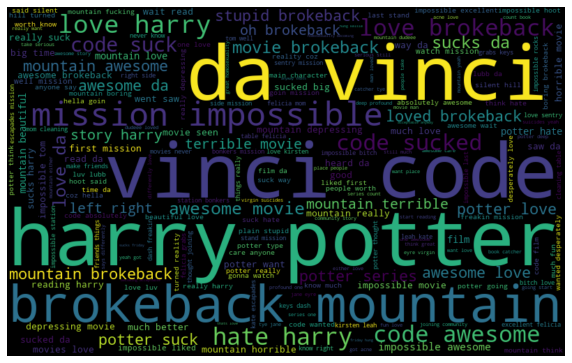

In [90]:
all_words = ' '.join([text for text in final_Train["preprocessed_text"]])#give all the wrod in train file
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)#generate word cloud

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

B) Understanding the common words used in the text: WordCloud(test data)

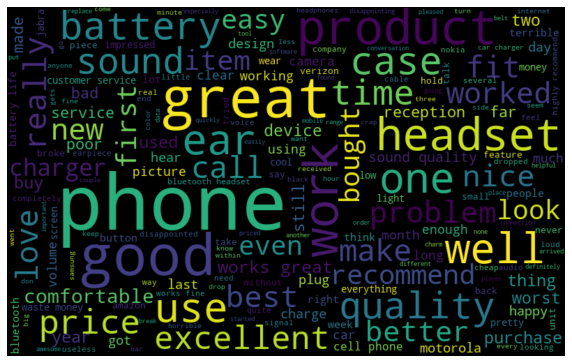

In [91]:
all_words = ' '.join([text for text in final_Test["preprocessed_text"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [92]:
final_Train["label"]=targets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C)Words in positive tweets

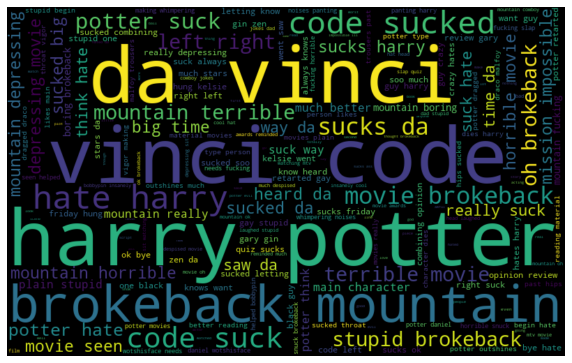

In [95]:
normal_words =' '.join([text for text in final_Train['preprocessed_text'][final_Train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


D) Words in negative tweets

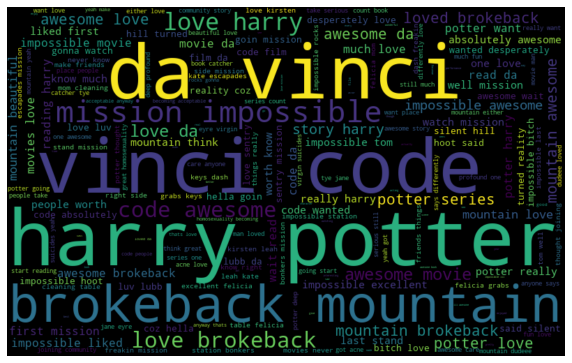

In [96]:
normal_words =' '.join([text for text in final_Train['preprocessed_text'][final_Train['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h1>Make Data Model Ready:</h1>



In [0]:
X=final_Train["preprocessed_text"]#data 
Y=final_Train["label"]#targets 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , stratify=Y , test_size=0.2) # this is random splitting data 80:20
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(6406,) (6406,)
(1602,) (1602,)


<h1><b>encoding text</h1>
<h3>BAG OF WORD 1</h3>

In [0]:
#create a function for auc and roc curve 
def auc_roc_plot(model,x_train,x_test):
    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])#it give diffrante threshold and tpr,fpr on train data
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])#it give diffrante threshold and tpr,fpr on test data
    #plot the auc and roc
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc=4)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   

In [0]:
#it give all the matrix and classification_report
def report(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [113]:
count_vect  = CountVectorizer(max_features=1000,ngram_range=(1,1),min_df=2)#initialization bow vectorizer
X_train_bow = count_vect.fit_transform(X_train)#fit and transfrom our train data
X_test_bow  =  count_vect.transform(X_test)#and transfrmm our test data
print(X_train_bow.shape, y_train.shape)#print shape
print(X_test_bow.shape,y_test.shape)

(6406, 1000) (6406,)
(1602, 1000) (1602,)


**1.1 : logistic regression**

In [120]:
lreg = LogisticRegression()
lreg.fit(X_train_bow, y_train) # training the model
prediction = lreg.predict_proba(X_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)#change data type into int
f1_score(y_test, prediction_int) # calculating f1 score

0.9639344262295082

In [137]:
report(y_test, lreg.predict(X_test_bow))#call the report function 

Null Accuracy: 44.3196%
Confusion Matrix
[[683  27]
 [ 31 861]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 96.3795%
Recall Score: 96.5247%
Specificity Score: 96.1972%
False Positive Rate: 3.8028%
Precision Score: 96.9595%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       710
           1       0.97      0.97      0.97       892

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



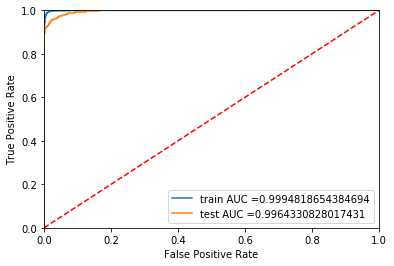

In [143]:
auc_roc_plot(lreg,X_train_bow,X_test_bow)

**1.2 :Support Vector Machine**

In [0]:
from sklearn import svm

In [146]:
svc_bow = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train_bow,y_train)#initialization and fit the model
prediction = svc_bow.predict_proba(X_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score

0.9679558011049724

Null Accuracy: 44.3196%
Confusion Matrix
[[685  25]
 [ 29 863]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 96.6292%
Recall Score: 96.7489%
Specificity Score: 96.4789%
False Positive Rate: 3.5211%
Precision Score: 97.1847%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       710
           1       0.97      0.97      0.97       892

    accuracy                           0.97      1602
   macro avg       0.97      0.97      0.97      1602
weighted avg       0.97      0.97      0.97      1602



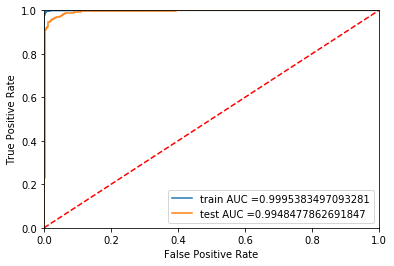

In [147]:
report(y_test, svc_bow.predict(X_test_bow))
auc_roc_plot(svc_bow,X_train_bow,X_test_bow)

**1.3 :RandomForest**

In [151]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train_bow, y_train)
prediction = rf.predict(X_test_bow)
f1_score(y_test, prediction)

0.9621254946297344

Null Accuracy: 44.3196%
Confusion Matrix
[[684  26]
 [ 41 851]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 95.8177%
Recall Score: 95.4036%
Specificity Score: 96.3380%
False Positive Rate: 3.6620%
Precision Score: 97.0353%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       710
           1       0.97      0.95      0.96       892

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



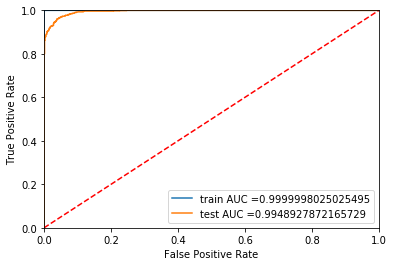

In [152]:
report(y_test, rf.predict(X_test_bow))
auc_roc_plot(rf,X_train_bow,X_test_bow)

**1.4 :xgboost**

In [154]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(X_train_bow, y_train)#fit the model
prediction = xgb_model.predict(X_test_bow)#predict the test data
f1_score(y_test, prediction)

0.9578888265019653

Null Accuracy: 44.3196%
Confusion Matrix
[[674  36]
 [ 39 853]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 95.3184%
Recall Score: 95.6278%
Specificity Score: 94.9296%
False Positive Rate: 5.0704%
Precision Score: 95.9505%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       710
           1       0.96      0.96      0.96       892

    accuracy                           0.95      1602
   macro avg       0.95      0.95      0.95      1602
weighted avg       0.95      0.95      0.95      1602



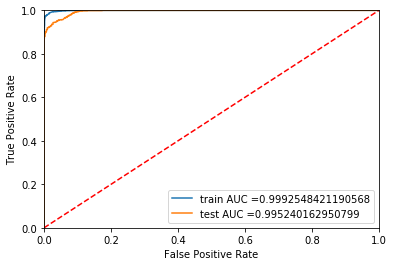

In [155]:
report(y_test, xgb_model.predict(X_test_bow))
auc_roc_plot(xgb_model,X_train_bow,X_test_bow)

**2 :TFIDF**

In [156]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf  =  tfidf_vectorizer.transform(X_test)
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape,y_test.shape)

(6406, 1000) (6406,)
(1602, 1000) (1602,)


***2.1 :LogisticRegression***

Null Accuracy: 44.3196%
Confusion Matrix
[[682  28]
 [ 30 862]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 96.3795%
Recall Score: 96.6368%
Specificity Score: 96.0563%
False Positive Rate: 3.9437%
Precision Score: 96.8539%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       710
           1       0.97      0.97      0.97       892

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



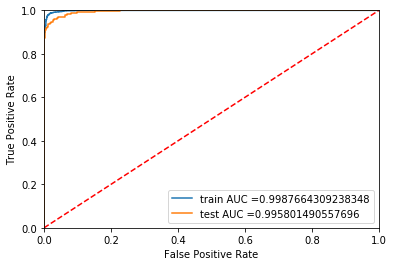

In [212]:
lreg_tfidf= LogisticRegression()
lreg_tfidf.fit(X_train_tfidf, y_train) # training the model
prediction = lreg_tfidf.predict_proba(X_test_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score
report(y_test, lreg_tfidf.predict(X_test_tfidf))
auc_roc_plot(lreg_tfidf,X_train_tfidf,X_test_tfidf)

**2.2 :SVM**

Null Accuracy: 44.3196%
Confusion Matrix
[[679  31]
 [ 23 869]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 96.6292%
Recall Score: 97.4215%
Specificity Score: 95.6338%
False Positive Rate: 4.3662%
Precision Score: 96.5556%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       710
           1       0.97      0.97      0.97       892

    accuracy                           0.97      1602
   macro avg       0.97      0.97      0.97      1602
weighted avg       0.97      0.97      0.97      1602



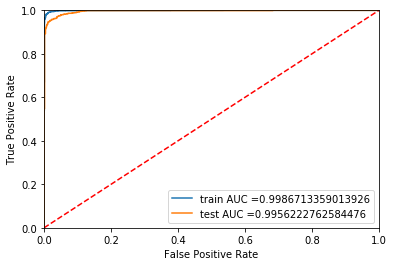

In [188]:
svc_tfidf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train_tfidf,y_train)
prediction = svc_tfidf.predict_proba(X_test_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score
report(y_test, svc_tfidf.predict(X_test_tfidf))
auc_roc_plot(svc_tfidf,X_train_tfidf,X_test_tfidf)

**2.3 :RANDOM FOREST**

Null Accuracy: 44.3196%
Confusion Matrix
[[677  33]
 [ 35 857]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 95.7553%
Recall Score: 96.0762%
Specificity Score: 95.3521%
False Positive Rate: 4.6479%
Precision Score: 96.2921%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       710
           1       0.96      0.96      0.96       892

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



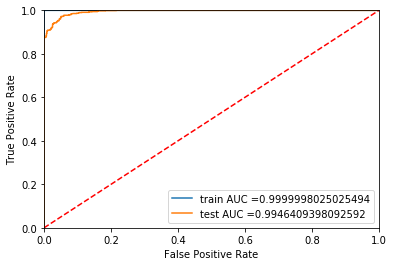

In [191]:
rf_tfidf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train_tfidf, y_train)
prediction = rf_tfidf.predict(X_test_tfidf)
f1_score(y_test, prediction)
report(y_test, rf_tfidf.predict(X_test_tfidf))
auc_roc_plot(rf_tfidf,X_train_tfidf,X_test_tfidf)

**2.4 :XGBOOST**

Null Accuracy: 44.3196%
Confusion Matrix
[[674  36]
 [ 51 841]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 94.5693%
Recall Score: 94.2825%
Specificity Score: 94.9296%
False Positive Rate: 5.0704%
Precision Score: 95.8951%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       710
           1       0.96      0.94      0.95       892

    accuracy                           0.95      1602
   macro avg       0.94      0.95      0.95      1602
weighted avg       0.95      0.95      0.95      1602



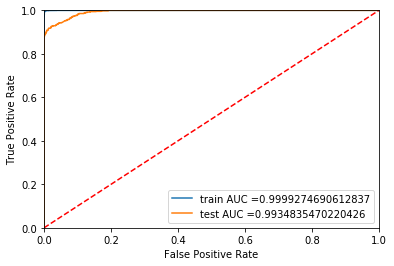

In [192]:
xgb_model_tfidf = XGBClassifier(max_depth=6, n_estimators=1000).fit(X_train_tfidf, y_train)
prediction = xgb_model_tfidf.predict(X_test_tfidf)
f1_score(y_test, prediction)
report(y_test, xgb_model_tfidf.predict(X_test_tfidf))
auc_roc_plot(xgb_model_tfidf,X_train_tfidf,X_test_tfidf)

<h1><b>3 :word2vectors</b></h1>


train data

In [0]:
i=0
list_of_sentance_train=[]#create a empty list
for sentance in X_train.values:# run the loop in train text data
    list_of_sentance_train.append(sentance.split())#split the row and store the words

In [197]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=100, workers=4)#this is our model
w2v_words = list(w2v_model.wv.vocab)#contain all the words 
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  505
sample words  ['i', 'wanted', 'desperately', 'love', 'the', 'da', 'vinci', 'code', 'film', 'harry', 'potter', 'awesome', 'care', 'anyone', 'says', 'differently', 'know', 'movie', 'special', 'part', 'family', 'thing', 'enjoyed', 'always', 'knows', 'want', 'guy', 'crazy', 'hates', 'luv', 'lubb', 'which', 'said', 'silent', 'hill', 'turned', 'reality', 'coz', 'hella', 'like', 'goin', 'mission', 'impossible', 'bitch', 'going', 'start', 'reading', 'series', 'one', 'story']


In [198]:
sent_vectors_train = [];
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 100, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████| 6406/6406 [00:00<00:00, 23302.98it/s]

6406
100


test data

In [0]:
i=0
list_of_sentance_test=[]
for sentance in X_test.values:
    list_of_sentance_test.append(sentance.split())

In [200]:
sent_vectors_test= [];
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████| 1602/1602 [00:00<00:00, 20524.83it/s]

1602
100


**3.1 :LogisticRegression**

Null Accuracy: 44.3196%
Confusion Matrix
[[618  92]
 [ 79 813]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 89.3258%
Recall Score: 91.1435%
Specificity Score: 87.0423%
False Positive Rate: 12.9577%
Precision Score: 89.8343%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       710
           1       0.90      0.91      0.90       892

    accuracy                           0.89      1602
   macro avg       0.89      0.89      0.89      1602
weighted avg       0.89      0.89      0.89      1602



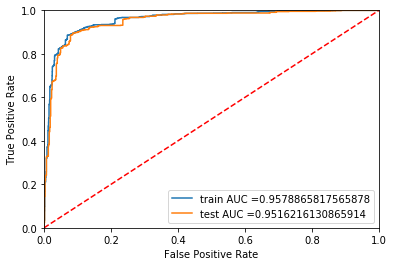

In [204]:
lreg_w2v= LogisticRegression()
lreg_w2v.fit(sent_vectors_train, y_train) # training the model
prediction = lreg_w2v.predict_proba(sent_vectors_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score
report(y_test, lreg_w2v.predict(sent_vectors_test))
auc_roc_plot(lreg_w2v,sent_vectors_train,sent_vectors_test)

**3.2 :SVM**

Null Accuracy: 44.3196%
Confusion Matrix
[[645  65]
 [ 91 801]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 90.2622%
Recall Score: 89.7982%
Specificity Score: 90.8451%
False Positive Rate: 9.1549%
Precision Score: 92.4942%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       710
           1       0.92      0.90      0.91       892

    accuracy                           0.90      1602
   macro avg       0.90      0.90      0.90      1602
weighted avg       0.90      0.90      0.90      1602



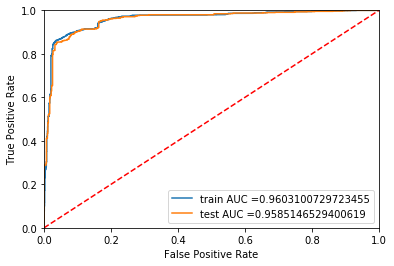

In [205]:
svc_w2v = svm.SVC(kernel='linear', C=1, probability=True).fit(sent_vectors_train,y_train)
prediction = svc_w2v.predict_proba(sent_vectors_test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int) # calculating f1 score
report(y_test, svc_w2v.predict(sent_vectors_test))
auc_roc_plot(svc_w2v,sent_vectors_train,sent_vectors_test)

**3.3 :RandomForest**

Null Accuracy: 44.3196%
Confusion Matrix
[[641  69]
 [ 54 838]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 92.3221%
Recall Score: 93.9462%
Specificity Score: 90.2817%
False Positive Rate: 9.7183%
Precision Score: 92.3925%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       710
           1       0.92      0.94      0.93       892

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



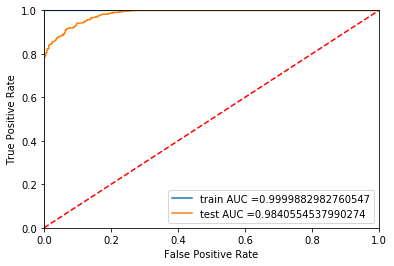

In [206]:
rf_w2v = RandomForestClassifier(n_estimators=400, random_state=11).fit(sent_vectors_train, y_train)
prediction = rf_w2v.predict(sent_vectors_test)
f1_score(y_test, prediction)
report(y_test, rf_w2v.predict(sent_vectors_test))
auc_roc_plot(rf_w2v,sent_vectors_train,sent_vectors_test)

**3.4 :XGBOOGT**

Null Accuracy: 44.3196%
Confusion Matrix
[[647  63]
 [ 61 831]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 92.2597%
Recall Score: 93.1614%
Specificity Score: 91.1268%
False Positive Rate: 8.8732%
Precision Score: 92.9530%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       710
           1       0.93      0.93      0.93       892

    accuracy                           0.92      1602
   macro avg       0.92      0.92      0.92      1602
weighted avg       0.92      0.92      0.92      1602



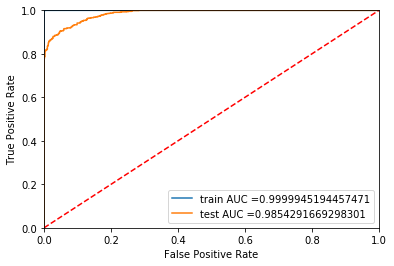

In [207]:
xgb_model_w2v = XGBClassifier(max_depth=6, n_estimators=1000).fit(sent_vectors_train, y_train)
prediction = xgb_model_w2v.predict(sent_vectors_test)
f1_score(y_test, prediction)
report(y_test, xgb_model_w2v.predict(sent_vectors_test))
auc_roc_plot(xgb_model_w2v,sent_vectors_train,sent_vectors_test)

**Conclusion**

In [0]:
from prettytable import PrettyTable

In [216]:
x = PrettyTable()
x.field_names = ["Vectorizer", "algorithm ", "auc train","auc test"]
x.add_row(["BOW","logistic regression",99.94,99.64])
x.add_row(["TFIDF","logistic regression",99.97,99.58])
x.add_row(["W2V","logistic regression",95.78,95.16])
x.add_row([" "," ","",""])

x.add_row(["BOW","SVM",99.95,99.48])
x.add_row(["TFIDF","SVM",99.86,99.56])
x.add_row(["W2V","SVM",96.03,95.85])
x.add_row([" "," ","",""])
x.add_row(["BOW","random forest",99.99,99.48])
x.add_row(["TFIDF","random forest",99.99,99.46])
x.add_row(["W2V","random forest",99.99,98.40])
x.add_row([" "," ","",""])
x.add_row(["BOW","XGboost",99.92,99.52])
x.add_row(["TFIDF","XGboost",99.99,99.34])
x.add_row(["W2V","XGboost",99.99,98.54])
print(x)

+------------+---------------------+-----------+----------+
| Vectorizer |      algorithm      | auc train | auc test |
+------------+---------------------+-----------+----------+
|    BOW     | logistic regression |   99.94   |  99.64   |
|   TFIDF    | logistic regression |   99.97   |  99.58   |
|    W2V     | logistic regression |   95.78   |  95.16   |
|            |                     |           |          |
|    BOW     |         SVM         |   99.95   |  99.48   |
|   TFIDF    |         SVM         |   99.86   |  99.56   |
|    W2V     |         SVM         |   96.03   |  95.85   |
|            |                     |           |          |
|    BOW     |    random forest    |   99.99   |  99.48   |
|   TFIDF    |    random forest    |   99.99   |  99.46   |
|    W2V     |    random forest    |   99.99   |   98.4   |
|            |                     |           |          |
|    BOW     |       XGboost       |   99.92   |  99.52   |
|   TFIDF    |       XGboost       |   9

here we can see our bow logistic regression model give higher test auc score 99.64% so we use this model on our (test_data)3.txt file.
<br>
for that first we change the data into bow vector and then vectors are give our model  

**TEST BOW**

In [223]:
#change into vectors
count_vect_test  = CountVectorizer(max_features=1000,ngram_range=(1,1),min_df=1)
test_data = count_vect_test.fit_transform(final_Test["preprocessed_text"])
print(test_data.shape)

(932, 1000)


In [0]:
import pickle 
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lreg) 
# Load the pickled model 
lr_from_pickle = pickle.loads(saved_model) 

In [0]:
test_pred = lr_from_pickle.predict_proba(test_data)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

In [0]:
df_output=pd.DataFrame()
df_output["index"]=final_Test["index"]
df_output["text"]=final_Test["preprocessed_text"]
df_output['label'] =test_pred_int
df_output[['index','text','label']].to_csv('/content/drive/My Drive/nlp assignments/output.csv',index=False)#save the file

In [237]:
output=pd.read_csv("/content/drive/My Drive/nlp assignments/output.csv")
output.head()

,index,text,label
0,0,i exchanged sony ericson z i pretty happy deci...,1
1,1,oh i forgot also mention weird color effect phone,0
2,2,verizon tech support walked procedures none wo...,1
3,3,better expect,1
4,4,this great little item,1
